In [1]:
import environments
import numpy as np
from agents.agents import MonteCarloPredictor
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
env = environments.make('hitstand')

In [3]:
type(env)

environments.blackjack.HitStand

In [4]:
env.action_space_description

{0: 'stand', 1: 'hit'}

In [5]:
env.reward_space_description

{-1: 'The House beats Jack',
 0: 'Draw/not terminal',
 1: 'Jack beats the House',
 1.5: 'Blackjack for Jack'}

In [6]:
env.observation_space_description

{0: "Player's total", 1: "Dealer's card value", 2: 'Player has got usable ace'}

In [7]:
env.observation_space_high

array([30, 26,  1])

In [8]:
env.observation_space_low

array([4, 2, 0])

In [9]:
class RandomPolicyAgent(MonteCarloPredictor):

    def follow_policy(self, *args):
        return np.random.randint(0, self.environment.action_space_len)

In [10]:
agent = RandomPolicyAgent(env)

In [11]:
agent.follow_policy()

0

In [12]:
def run_experiment(env, agent, episodes, show, save=None, collect_rewards=None):
    rewards = []
    average_rewards = []
    for episode in range(episodes):
        if (episode+1) % show ==0:
            print('Episode {0}:'.format(episode+1))
            env.render()

        state, reward, terminal, _ = env.reset()
        agent.evaluate_state(state, reward, terminal)
        while not terminal:
            action = agent.follow_policy(state, reward, terminal)
            state, reward, terminal, _ = env.step(action)
            agent.evaluate_state(state, reward, terminal)        
        
        rewards.append(reward)
        
        if save:
            if (episode+1) % save == 0:
                agent.save_table(episode+1)
                
        if collect_rewards:
            if (episode+1) % collect_rewards == 0:
                average_reward = sum(rewards[-collect_rewards:])/collect_rewards
                average_rewards.append(average_reward)
    
    return average_rewards


In [13]:
EPISODES = 100_000
SHOW_EVERY = 100
SAVE_EVERY = 50_000
COLLECT_EVERY = 100
results = run_experiment(env, agent, EPISODES, SHOW_EVERY, SAVE_EVERY, COLLECT_EVERY)

Episode 100:
Jack:
	-Cards: ['4C', 'KH']
	-Value : 14
Dealer:
	-Cards: ['10S']
	-Value : 10
Jack decides to: HIT
	-Cards: ['4C', 'KH', 'KH']
	-Value : 24
Dealer:
	-Cards: ['10S']
	-Value : 10
THE HOUSE BEATS JACK
Episode 200:
Jack:
	-Cards: ['5D', '9S']
	-Value : 14
Dealer:
	-Cards: ['5H']
	-Value : 5
Jack decides to: HIT
	-Cards: ['5D', '9S', '8H']
	-Value : 22
Dealer:
	-Cards: ['5H']
	-Value : 5
THE HOUSE BEATS JACK
Episode 300:
Jack:
	-Cards: ['4D', '2C']
	-Value : 6
Dealer:
	-Cards: ['5H']
	-Value : 5
Jack decides to: HIT
	-Cards: ['4D', '2C', 'KD']
	-Value : 16
Jack decides to: HIT
	-Cards: ['4D', '2C', 'KD', '10C']
	-Value : 26
Dealer:
	-Cards: ['5H']
	-Value : 5
THE HOUSE BEATS JACK
Episode 400:
Jack:
	-Cards: ['2S', '7C']
	-Value : 9
Dealer:
	-Cards: ['AD']
	-Value : 11
Jack decides to: STAND
	-Cards: ['2S', '7C']
	-Value : 9
Dealer:
	-Cards: ['AD', 'KS']
	-Value : 21
THE HOUSE BEATS JACK
Episode 500:
Jack:
	-Cards: ['9S', '3C']
	-Value : 12
Dealer:
	-Cards: ['10D']
	-Value : 1

In [14]:
agent.save_at_episodes

[50000, 100000]

In [15]:
type(agent).__name__

'RandomPolicyAgent'

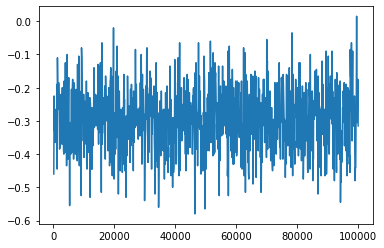

In [16]:
plt.plot(range(COLLECT_EVERY,EPISODES+1, COLLECT_EVERY), results)

In [17]:
adfuller(results)

(-30.545467478487037,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 -1789.7191511780147)

In [18]:
class FixAgent(MonteCarloPredictor):

    def follow_policy(self, observation, *args):
        if observation[0] > 19:
            return 0
        else:
            return 1

In [19]:
agent = FixAgent(env)

In [20]:
EPISODES = 100_000
SHOW_EVERY = 100
SAVE_EVERY = 50_000
COLLECT_EVERY = 100
results = run_experiment(env, agent, EPISODES, SHOW_EVERY, SAVE_EVERY, COLLECT_EVERY)

Episode 100:
Jack:
	-Cards: ['7H', '2S']
	-Value : 9
Dealer:
	-Cards: ['QH']
	-Value : 10
Jack decides to: HIT
	-Cards: ['7H', '2S', '4D']
	-Value : 13
Jack decides to: HIT
	-Cards: ['7H', '2S', '4D', '6C']
	-Value : 19
Jack decides to: HIT
	-Cards: ['7H', '2S', '4D', '6C', '6S']
	-Value : 25
Dealer:
	-Cards: ['QH']
	-Value : 10
THE HOUSE BEATS JACK
Episode 200:
Jack:
	-Cards: ['6C', '2D']
	-Value : 8
Dealer:
	-Cards: ['9S']
	-Value : 9
Jack decides to: HIT
	-Cards: ['6C', '2D', '5D']
	-Value : 13
Jack decides to: HIT
	-Cards: ['6C', '2D', '5D', '10C']
	-Value : 23
Dealer:
	-Cards: ['9S']
	-Value : 9
THE HOUSE BEATS JACK
Episode 300:
Jack:
	-Cards: ['5D', 'JH']
	-Value : 15
Dealer:
	-Cards: ['9D']
	-Value : 9
Jack decides to: HIT
	-Cards: ['5D', 'JH', '8C']
	-Value : 23
Dealer:
	-Cards: ['9D']
	-Value : 9
THE HOUSE BEATS JACK
Episode 400:
Jack:
	-Cards: ['5C', '8S']
	-Value : 13
Dealer:
	-Cards: ['7D']
	-Value : 7
Jack decides to: HIT
	-Cards: ['5C', '8S', 'JD']
	-Value : 23
Dealer:
	-

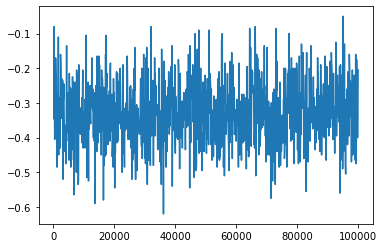

In [21]:
plt.plot(range(COLLECT_EVERY,EPISODES+1, COLLECT_EVERY), results)

In [22]:
adfuller(results)

(-31.753966660496953,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 -1866.49595697096)